In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Consumer creditworthiness train data.xlsx') #reading the data 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


## lets check for null values if any

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

-  The above shows that some of the features does misses values
- It would be usefull to see these missing numbers in ration/% form to understand better how much impact does these missing values affect the data set

In [5]:
def percent_missing(df):
    percent_misg = 100*df.isnull().sum()/len(df)
    percent_misg = percent_misg[percent_misg>0].sort_values()
    
    return percent_misg

#just converting into percent missing

In [6]:
percent_misg = percent_missing(df)
percent_misg

Married             0.575816
Gender              1.919386
Dependents          2.495202
Loan_Amount_Term    2.687140
Self_Employed       5.182342
Credit_History      8.253359
dtype: float64

- **Seems like credit history and self employed among those with a considerable missing values**

### Lets plot the % missing

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

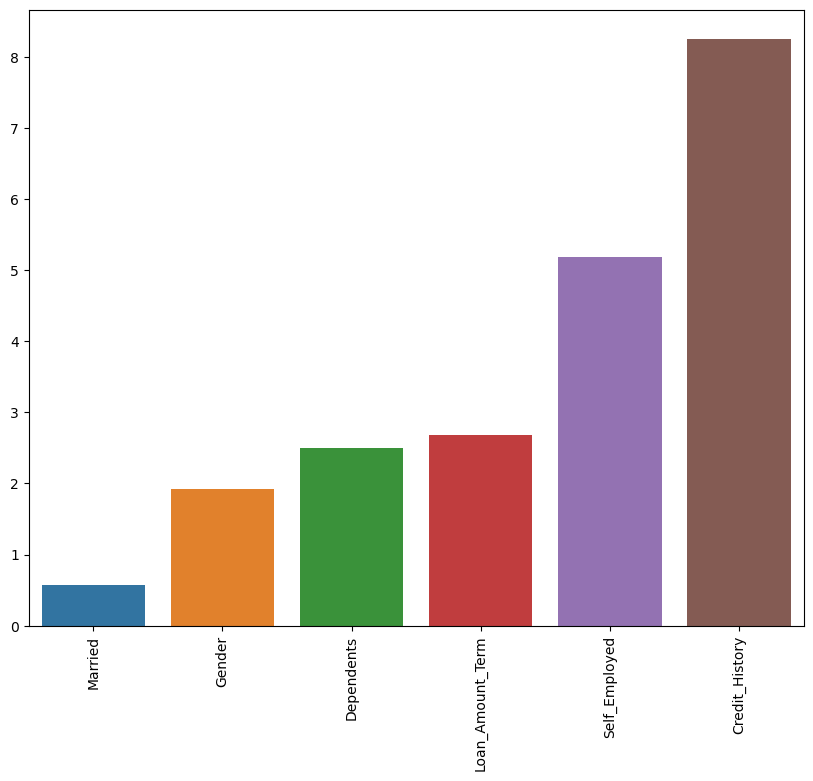

In [8]:
plt.figure(figsize=(10,8),dpi=100)
sns.barplot(x=percent_misg.index, y=percent_misg)
plt.xticks(rotation=90);

- **From above observations we suggest**
    - The observations which which have a missing % less than 1% can be removed.
    - Married have <1% missing and remvoving it will have negligible effect on the data

In [9]:
df.loc[(df['Married'].isnull())]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,114100,Male,NaN,NaN,Graduate,No,858600,169650.0,320000,360.0,1.0,Urban,Y
228,133107,Male,NaN,NaN,Graduate,No,1070550,0.0,316000,480.0,1.0,Semiurban,Y
435,579487,Female,NaN,NaN,Graduate,No,2260575,0.0,0,240.0,1.0,Semiurban,Y


**From the above sample of data with Married is having a missing values the dependents are also missing**
 - Therefore We cannot fill the married column using any other feature available to us
 - So it is logical to remove these 3 observations

In [10]:
#dropping these rows for Married is null
df.dropna(axis=0, subset=['Married'], inplace=True)

### Since Loan_ID is unique to each loan application and is not a factor that influencing the creditworthiness of the applicant we can remove the entire column. Also we already have index numbers to identify an Observation

In [11]:
df = df.drop('Loan_ID', axis=1)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [13]:
# # Lets continue with missing values
# plt.figure(figsize=(10,8),dpi=100)
# sns.barplot(x=percent_misg.index, y=percent_misg)
# plt.xticks(rotation=90);

In [14]:
df.loc[(df['Loan_Amount_Term']>400) & (df['Self_Employed']=='Yes')&(df['Loan_Status']=='Y')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,Male,No,0,Graduate,Yes,4537350,0.0,1300000,480.0,NaN,Urban,Y


**There is only one self employed person who  have a tenure > 400**

In [55]:
# df.loc[ (df['ApplicantIncome']>df['LoanAmount'])& (df['Loan_Status']=='Y')& (df['Credit_History'].isnull())]

**It seems from above observation there is no person with 0 credit history having thier Income greater than loan amount with a Y loan status**

In [16]:
df.loc[ (df['ApplicantIncome']>df['LoanAmount'])& (df['Loan_Status']=='Y')& (df['Credit_History'].isnull()),'Credit_History']=1

We are filling those missing data in credit history with 1

In [17]:
percent_misg = percent_missing(df)

In [18]:
# plt.figure(figsize=(10,8),dpi=100)
# sns.barplot(x=percent_misg.index, y=percent_misg)
# plt.xticks(rotation=90);

In [19]:
df.loc[(df['Loan_Status']=='Y')&(df['Credit_History']==0)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,Female,No,0,Graduate,No,480825,2020500.0,274000,360.0,0.0,Semiurban,Y
155,Male,Yes,3+,Graduate,No,8999775,0.0,1200000,180.0,0.0,Semiurban,Y
201,Male,No,2,Graduate,No,1107675,0.0,332000,360.0,0.0,Semiurban,Y
267,Male,Yes,3+,Graduate,No,974925,407475.0,320000,360.0,0.0,Urban,Y
326,Male,No,0,Graduate,No,1106325,0.0,260000,360.0,0.0,Rural,Y
453,Male,Yes,0,Graduate,No,558675,554850.0,180000,180.0,0.0,Rural,Y


Seems like there are lot many entries of accepted loans with a postive credit history than with 0 credit history. From this insight we can fill the missing values of credit historys

In [20]:
df.loc[(df['Loan_Status']=='N')&(df['Credit_History'].isnull()),'Credit_History']=0

In [21]:
# percent_misg = percent_missing(df)
# plt.figure(figsize=(10,8),dpi=100)
# sns.barplot(x=percent_misg.index, y=percent_misg)
# plt.xticks(rotation=90);

Credit history has been removed

In [22]:
df.loc[(df['Gender'].isnull())&(df['Dependents'].isnull())&(df['Loan_Amount_Term'].isnull())&(df['Self_Employed'].isnull())]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [23]:
df.shape

(518, 12)

In [24]:
df.loc[(df['Self_Employed']=='Yes')&(df['Loan_Amount_Term']>400)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,Male,No,0,Graduate,Yes,4537350,0.0,1300000,480.0,1.0,Urban,Y


In [25]:
df.loc[(df['Self_Employed']=='Yes')&(df['Loan_Amount_Term'].isnull())]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
44,Male,Yes,0,Not Graduate,Yes,1056375,0.0,192000,NaN,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,1238175,1010250.0,140000,NaN,1.0,Semiurban,Y


Since there is only person with a self employed status with loan term > 400 we can fill the missing values of loan amount term of self employed customers with the mean value of Loan term < 400

In [26]:
selected_rows = df[df['Loan_Amount_Term'] < 400]

# Calculate the average of the Loan_amount column for the selected rows ignoring missing values
loan_term_avg = selected_rows['Loan_Amount_Term'].mean(skipna=True)
loan_term_avg

339.5437881873727

In [27]:
df.loc[(df['Self_Employed']=='Yes')&(df['Loan_Amount_Term'].isnull()),'Loan_Amount_Term']=340

In [28]:
df.dropna(axis=0, subset=['Dependents'], inplace=True)

Since we cant correctly fill the missing values of dependents we can remove then as it is only <2%

In [29]:
#similarly can remove missing Gender rows
df.dropna(axis=0, subset=['Gender'], inplace=True)

In [30]:
# percent_misg = percent_missing(df)
# plt.figure(figsize=(10,8))
# sns.barplot(x=percent_misg.index, y=percent_misg)
# plt.xticks(rotation=90);

In [31]:
df.loc[(df['Self_Employed'].isnull())&(df['CoapplicantIncome']>0)].shape

(15, 12)

- the number of peope who are self employed and have a co applicant are much less than the number of people who are not self employed and have a co applicant

In [32]:
df.loc[(df['Self_Employed'].isnull())&(df['CoapplicantIncome']>0),'Self_Employed']='No'

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [34]:
df.dropna(axis=0, subset=['Loan_Amount_Term','Self_Employed'], inplace=True)

In [35]:
df.shape

(474, 12)

In [36]:
#Applying OHE with drop first not enable and will remove redundant manually
# df = pd.get_dummies(df, drop_first=False)

In [37]:
# df= df.drop('Gender_Female',axis=1)
# df = df.drop('Married_No',axis=1)
# df = df.drop('Education_Not Graduate',axis=1)
# df = df.drop('Self_Employed_No',axis = 1)
# df = df.drop('Loan_Status_N',axis = 1)

In [38]:
df.isnull().sum() #verifying no null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Hypothesis testing for categorical features

1. Null Hypothesis, N0: Features are insignificant to loan status. Na : has significant effect

Conducting Chi2 test for independence

In [39]:
from scipy.stats import chi2_contingency

In [40]:
# Create a contingency table
cont_table = pd.crosstab(df['Gender'], df['Loan_Status'])

# Conduct the chi-square test
chi2, pval, dof, exp_freq = chi2_contingency(cont_table)

# Print the p-value
print('p-value:', pval)

p-value: 0.6501405284407019


**There fore we fail to reject the Null hypothesis(considering a significance level of 0.05). Gender do not affect the Loan Status**

In [41]:

# Loop through each categorical feature and perform a chi-square test with the target variable
cat_cols = ['Gender', 'Education', 'Self_Employed', 'Property_Area','Married']
# Set the significance level
alpha = 0.1
pvalue_C=[]

# Loop through each categorical feature and perform a chi-square test with the target variable
for col in cat_cols:
    cont_table = pd.crosstab(df[col], df['Loan_Status'])
    chi2, pval, dof, exp_freq = chi2_contingency(cont_table)
    pvalue_C.append(pval)
    if pval < alpha:
        print(f"{col} vs LoanStatus is significant (p-value: {pval})")
    else:
        print(f"{col} vs LoanStatus is not significant (p-value: {pval})")

Gender vs LoanStatus is not significant (p-value: 0.6501405284407019)
Education vs LoanStatus is significant (p-value: 0.0964040078580344)
Self_Employed vs LoanStatus is not significant (p-value: 0.8439514357511773)
Property_Area vs LoanStatus is significant (p-value: 0.0009191785863088136)
Married vs LoanStatus is significant (p-value: 0.04117253465094671)


### Notes for above test

- Initally chose a significance level of 0.05 which gave 0.09 for education, since it was a close value we chose 0.1

## ANOVA test for Numerical features

In [42]:
from scipy.stats import f_oneway

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 520
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             474 non-null    object 
 1   Married            474 non-null    object 
 2   Dependents         474 non-null    object 
 3   Education          474 non-null    object 
 4   Self_Employed      474 non-null    object 
 5   ApplicantIncome    474 non-null    int64  
 6   CoapplicantIncome  474 non-null    float64
 7   LoanAmount         474 non-null    int64  
 8   Loan_Amount_Term   474 non-null    float64
 9   Credit_History     474 non-null    float64
 10  Property_Area      474 non-null    object 
 11  Loan_Status        474 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 48.1+ KB


In [44]:
df.loc[(df['Dependents']=='3+'),'Dependents']=3

In [45]:
#converting the dependent column to int64
df['Dependents'] = df['Dependents'].astype('int64')

In [46]:
num_cols = ['Dependents', 'LoanAmount', 'Loan_Amount_Term','ApplicantIncome','CoapplicantIncome','Credit_History']
alpha = 0.1
pvalues = []
# Perform ANOVA for each numerical feature with the target variable
for col in num_cols:
    # Split the data into multiple groups based on the target variable
    groups = []
    for group_name in df['Loan_Status'].unique():
        group = df[df['Loan_Status'] == group_name][col]
        groups.append(group)
    
    # Perform ANOVA
    fstat, pval = f_oneway(*groups)
    pvalues.append(pval)
    # Print the result
    if pval < alpha:
        print(f"{col} vs LoanStatus is significant (p-value = {pval:.3f})")
    else:
        print(f"{col} vs LoanStatus is not significant (p-value = {pval:.3f})")


Dependents vs LoanStatus is not significant (p-value = 0.610)
LoanAmount vs LoanStatus is significant (p-value = 0.073)
Loan_Amount_Term vs LoanStatus is not significant (p-value = 0.541)
ApplicantIncome vs LoanStatus is not significant (p-value = 0.122)
CoapplicantIncome vs LoanStatus is not significant (p-value = 0.712)
Credit_History vs LoanStatus is significant (p-value = 0.000)


In [50]:
# fig, ax = plt.subplots(figsize=(14,6))
# ax.bar(num_cols, pvalues)
# ax.set_ylabel('p-value')
# ax.set_ylim([0, 1])
# ax.axhline(y=alpha, color='r', linestyle='--')
# ax.set_title('ANOVA p-values for numerical features vs LoanStatus')
# plt.show()

In [49]:
# fig, ax = plt.subplots(figsize=(14,6))
# ax.bar(cat_cols, pvalue_C)
# ax.set_ylabel('p-value ')
# ax.set_ylim([0, 1])
# ax.axhline(y=alpha, color='r', linestyle='--')
# ax.set_title('Chi2 p-values for Categorical vs LoanStatus')
# plt.show()

## Visualizations of categotrical features with Loan status


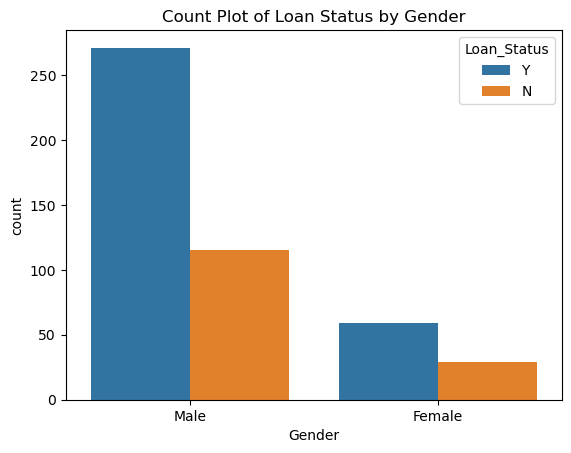

In [59]:
sns.countplot(x='Gender', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Gender');

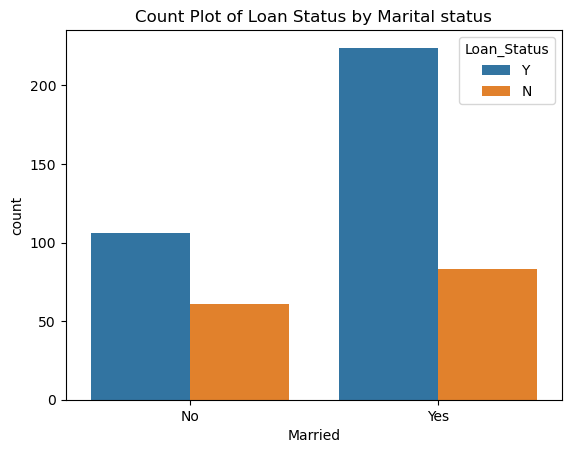

In [60]:
sns.countplot(x='Married', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Marital status');

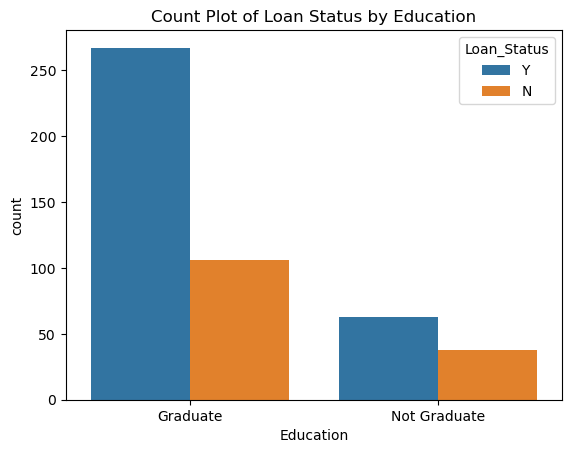

In [61]:
sns.countplot(x='Education', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Education');

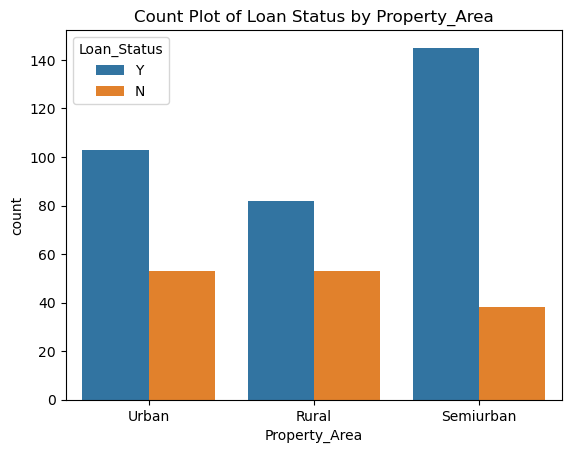

In [62]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Property_Area');

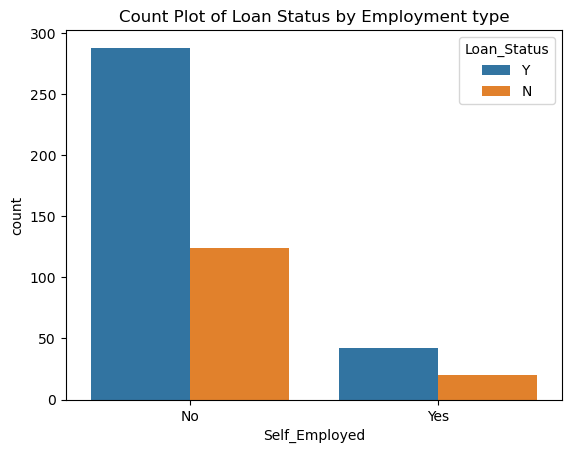

In [63]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Employment type');

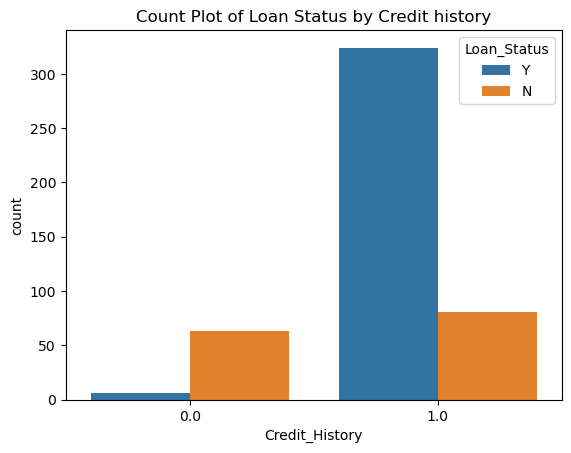

In [68]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df);
plt.title('Count Plot of Loan Status by Credit history');

## Numerical features with respect to Loan Status

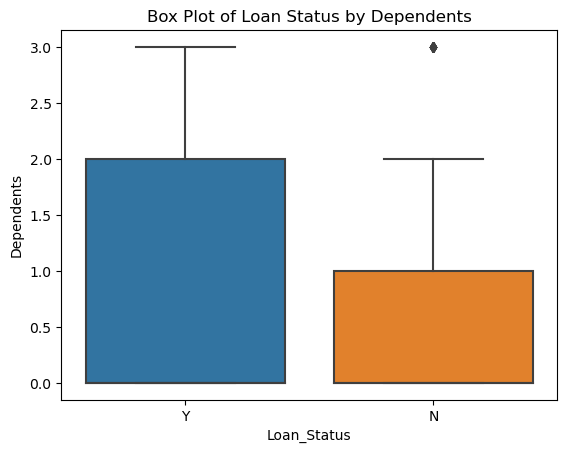

In [70]:
sns.boxplot(x='Loan_Status', y='Dependents', data=df)
plt.title('Box Plot of Loan Status by Dependents');
plt.show()

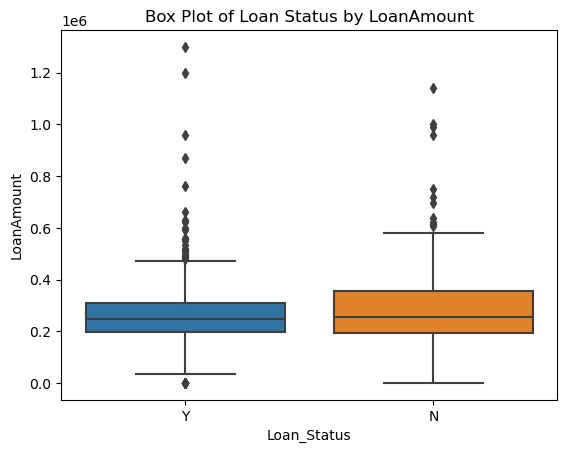

In [71]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Box Plot of Loan Status by LoanAmount');
plt.show()

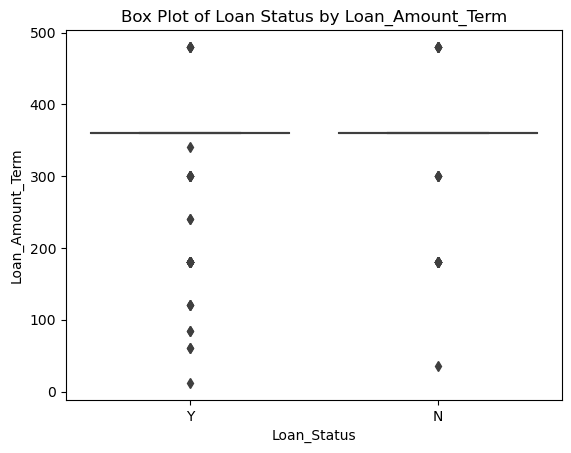

In [72]:
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=df)
plt.title('Box Plot of Loan Status by Loan_Amount_Term');
plt.show()

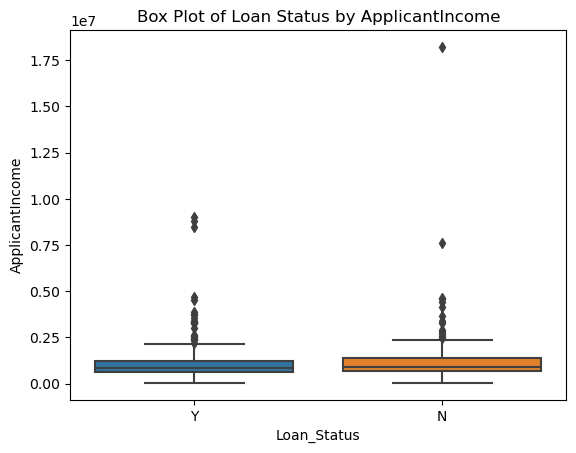

In [73]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Box Plot of Loan Status by ApplicantIncome');
plt.show()

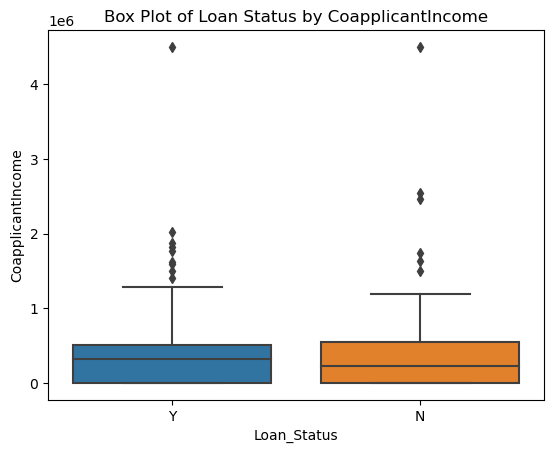

In [74]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Box Plot of Loan Status by CoapplicantIncome');
plt.show()